In [1]:
import sys, os
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
# Compute absolute path to the `src/` folder
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
SRC_PATH     = os.path.join(PROJECT_ROOT, "src")

if SRC_PATH not in sys.path:
    sys.path.insert(0, SRC_PATH)

from utils import get_dataloaders, train_model, plot_training_curves

In [13]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print("Using device:", device)

Using device: mps


## Data

In [4]:
COUNTRIES = ["Albania","Andorra","Argentina","Australia","Austria","Bangladesh","Belgium","Bhutan","Bolivia","Botswana","Brazil","Bulgaria","Cambodia","Canada","Chile","Colombia","Croatia","Czechia","Denmark","Dominican Republic","Ecuador","Estonia","Eswatini","Finland","France","Germany","Ghana","Greece","Greenland","Guatemala","Hungary","Iceland","Indonesia","Ireland","Israel","Italy","Japan","Jordan","Kenya","Kyrgyzstan","Latvia","Lesotho","Lithuania","Luxembourg","Malaysia","Mexico","Mongolia","Montenegro","Netherlands","New Zealand","Nigeria","North Macedonia","Norway","Palestine","Peru","Philippines","Poland","Portugal","Romania","Russia","Senegal","Serbia","Singapore","Slovakia","Slovenia","South Africa","South Korea","Spain","Sri Lanka","Sweden","Switzerland","Taiwan","Thailand","Turkey","Ukraine","United Arab Emirates","United Kingdom","United States","Uruguay"]
num_classes = len(COUNTRIES)

In [5]:
project_root   = Path().resolve().parent
train_root  = project_root/ "data" / "processed_data" / "small_dataset" / "train"
dev_root  = project_root/ "data" / "processed_data" / "small_dataset" / "dev"


In [6]:
train_loader = get_dataloaders(train_root, batch_size=32)
val_loader = get_dataloaders(dev_root, batch_size=32)

## Model

In [7]:
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)


In [8]:
for param in model.parameters():
    param.data = param.data.to(device)
for buf in model.buffers():
    buf.data = buf.data.to(device)

## Training

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= 1e-4)

In [ ]:
results = train_model(model, train_loader, val_loader, device, optimizer, project_root/ "models" / "resnet_finetuned" / "prova.pth", criterion=nn.CrossEntropyLoss(), epochs=10, eval_every=50, patience=3)

[Epoch 1/10, Batch 50/198] Train Loss=4.3591, Train Acc=0.0000 | Val Loss=4.3162, Val Acc=0.0316
  ↳ Checkpoint saved.

Interrupted! Saving latest model…
Training complete.


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/anaconda3/envs/cv_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/d5/5853p9zd6pvbjb8vz92bhmnc0000gn/T/ipykernel_57343/1932949508.py", line 1, in <module>
    plot_training_curves(answer["train_losses"], answer["val_losses"], answer["train_accs"], answer["val_accs"])
  File "/Users/michelangelonardi/Desktop/Università/Master/Bocconi Master/Year 1/Semester2/Computer Vision & Image processing/Final - project/rainbot/src/utils.py", line 175, in plot_training_curves
  File "/opt/anaconda3/envs/cv_env/lib/python3.10/site-packages/matplotlib/axes/_axes.py", line 1777, in plot
    lines = [*self._get_lines(self, *args, data=data, **kwargs)]
  File "/opt/anaconda3/envs/cv_env/lib/python3.10/site-packages/matplotlib/axes/_base.py", line 297, in __call__
    yield from self._plot_args(
  File "/opt/anaconda3/envs/cv_env/lib/python3.

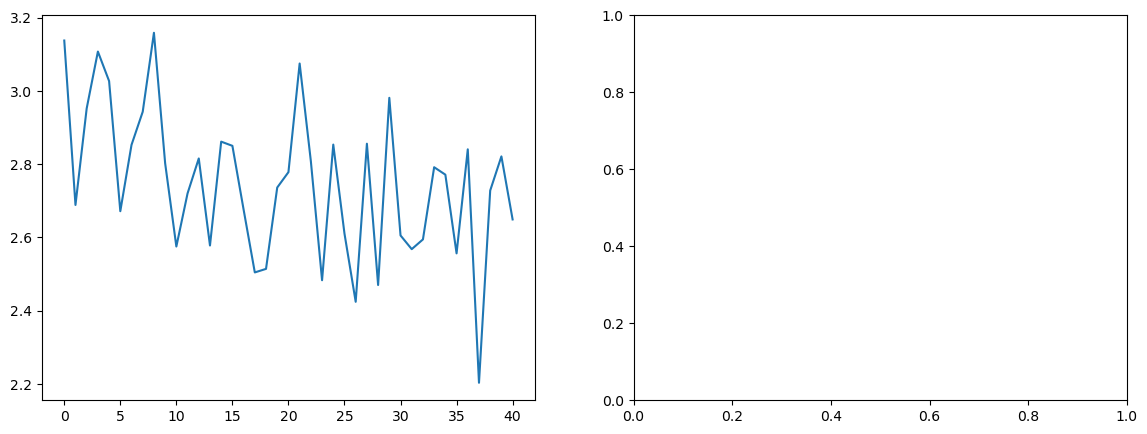

In [ ]:
plot_training_curves(results["train_losses"], results["val_losses"], results["train_accs"], results["val_accs"])